In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [3]:
##Load Dataset
df1 = pd.read_csv('./data/C2A2_data/BinnedCsvs_d400/ed157460d30113a689e487b88dcbef1f5d64cbd8bb7825f5f485013d.csv')

In [4]:
minimum = []
maximum = []
month = []
df1 = df1[~(df1['Date'].str.endswith(r'02-29'))]
times1 = pd.DatetimeIndex(df1['Date'])


In [5]:
df = df1[times1.year != 2015]
times = pd.DatetimeIndex(df['Date'])
for j in df.groupby([times.month, times.day]):
    minimum.append(min(j[1]['Data_Value']))
    maximum.append(max(j[1]['Data_Value']))

In [7]:
df2015 = df1[times1.year == 2015]
times2015 = pd.DatetimeIndex(df2015['Date'])
minimum2015 = []
maximum2015 = []
for j in df2015.groupby([times2015.month, times2015.day]):
    minimum2015.append(min(j[1]['Data_Value']))
    maximum2015.append(max(j[1]['Data_Value']))

In [8]:
minaxis = []
maxaxis = []
minvals = []
maxvals = []
for i in range(len(minimum)):
    if((minimum[i] - minimum2015[i]) > 0):
        minaxis.append(i)
        minvals.append(minimum2015[i])
    if((maximum[i] - maximum2015[i]) < 0):
        maxaxis.append(i)
        maxvals.append(maximum2015[i])

<IPython.core.display.Javascript object>


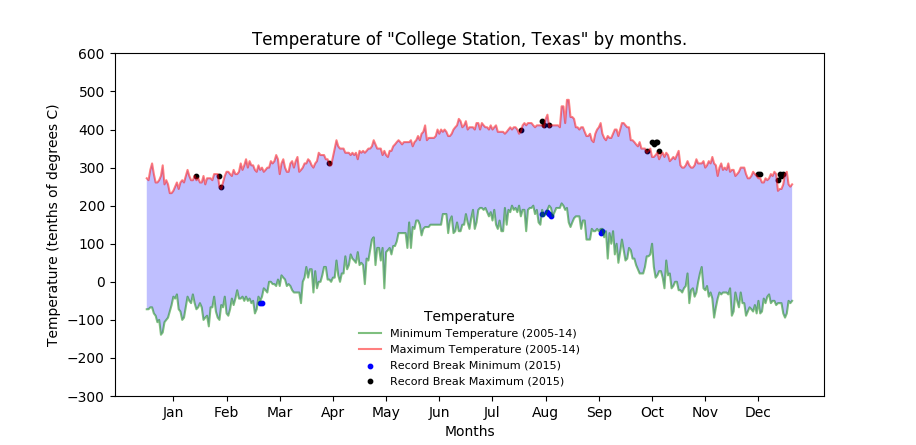

In [9]:
plt.figure()
colors = ['green', 'red']
plt.plot(minimum, c='green', alpha = 0.5, label = 'Minimum Temperature (2005-14)')
plt.plot(maximum, c ='red', alpha = 0.5, label = 'Maximum Temperature (2005-14)')
plt.scatter(minaxis, minvals, s = 10, c = 'blue', label = 'Record Break Minimum (2015)')
plt.scatter(maxaxis, maxvals, s = 10, c = 'black', label = 'Record Break Maximum (2015)')
plt.gca().fill_between(range(len(minimum)),
                       minimum, maximum, 
                       facecolor='blue', 
                       alpha=0.25)


In [13]:
plt.ylim(-300, 600)
plt.legend(loc = 8, frameon=False, title='Temperature', fontsize=8)
plt.xticks( np.linspace(15,15 + 30*11 , num = 12), (r'Jan', r'Feb', r'Mar', r'Apr', r'May', r'Jun', r'Jul', r'Aug', r'Sep', r'Oct', r'Nov', r'Dec') )
plt.xlabel('Months\n')
plt.ylabel('Temperature (tenths of degrees C)')
plt.title(r'Temperature of "College Station, Texas" by months.')
plt.show()